# Predictive Lead Classification Model for Sales Optimization.

# BUSINESS CASE:

**INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider
with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5
year**s. I

**Recent years, the employee performance indexes are not healthy and this is becoming a growing
concerns among the top management. There has been increased escalations on service delivery and
client satisfaction levels came down by 8 percentage points.**

**This project to analyses the current employee data and find
the core underlying causes of this performance issues**

# Project Goals:

1. **Department wise performances**
2. **Top 3 Important Factors effecting employee performance**
3. **A trained model which can predict the employee performance based on factors as inputs. This
will be used to hire employees**
4. **Recommendations to improve the employee performance based on insights from analysis.**

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading data

In [2]:
pip install xlrd

In [3]:
df=pd.read_excel(r"/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [4]:
df

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

In [5]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

# Domain Analysis


**EmpNumber :**
##### ID of the employees

**AGE :**
##### Age of the employees

**Gender :**
##### Gender of the employees

**EducationBackground :**
##### Education Background of the employees

**EmpDepartment :**
##### Department to which employees are assigned

**EmpJobRole :**
##### Job role of the employees

**BusinessTravelFrequency :**
##### How often the employee travel for business purpose

**EmpEnvironmentSatisfaction :**
##### Employee satisfaction is a measure of how content employees are with their jobs and employer. It indicates how well an employee's needs, aspirations, and expectations are met by their actual experiences at work

**EmpHourlyRate :**
##### An employee's hourly rate is the amount of money an employer agrees to pay them for each hour of work

**EmpJobInvolvement :**
##### Employee job involvement is the degree to which an employee is psychologically and emotionally invested in their work

**NumCompaniesWorked :**
##### Number of companies employee previously

**TotalWorkExperienceInYears :**
##### Work Experience of the employees

**Attrition :**
##### Employee Attrition refers to the reduction in a company's workforce due to employees leaving the organization.

# BASIC CHECKS

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [7]:
df.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [8]:
df.tail()

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1195                       0                     4         No   
1196                       0                     0         No   
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2  

[5 rows x 28 columns]

In [9]:
df.describe().T

count       mean        std   min   25%   50%  \
Age                           1200.0  36.918333   9.087289  18.0  30.0  36.0   
DistanceFromHome              1200.0   9.165833   8.176636   1.0   2.0   7.0   
EmpEducationLevel             1200.0   2.892500   1.044120   1.0   2.0   3.0   
EmpEnvironmentSatisfaction    1200.0   2.715833   1.090599   1.0   2.0   3.0   
EmpHourlyRate                 1200.0  65.981667  20.211302  30.0  48.0  66.0   
EmpJobInvolvement             1200.0   2.731667   0.707164   1.0   2.0   3.0   
EmpJobLevel                   1200.0   2.067500   1.107836   1.0   1.0   2.0   
EmpJobSatisfaction            1200.0   2.732500   1.100888   1.0   2.0   3.0   
NumCompaniesWorked            1200.0   2.665000   2.469384   0.0   1.0   2.0   
EmpLastSalaryHikePercent      1200.0  15.222500   3.625918  11.0  12.0  14.0   
EmpRelationshipSatisfaction   1200.0   2.725000   1.075642   1.0   2.0   3.0   
TotalWorkExperienceInYears    1200.0  11.330000   7.797228   0.0   6.0  10.0   
TrainingTimesLastYear         1200.0   2.785833   1.263446   0.0   2.0   3.0   
EmpWorkLifeBalance            1200.0   2.744167   0.699374   1.0   2.0   3.0   
ExperienceYearsAtThisCompany  1200.0   7.077500   6.236899   0.0   3.0   5.0   
ExperienceYearsInCurrentRole  1200.0   4.291667   3.613744   0.0   2.0   3.0   
YearsSinceLastPromotion       1200.0   2.194167   3.221560   0.0   0.0   1.0   
YearsWithCurrManager          1200.0   4.105000   3.541576   0.0   2.0   3.0   
PerformanceRating             1200.0   2.948333   0.518866   2.0   3.0   3.0   

                               75%    max  
Age                           43.0   60.0  
DistanceFromHome              14.0   29.0  
EmpEducationLevel              4.0    5.0  
EmpEnvironmentSatisfaction     4.0    4.0  
EmpHourlyRate                 83.0  100.0  
EmpJobInvolvement              3.0    4.0  
EmpJobLevel                    3.0    5.0  
EmpJobSatisfaction             4.0    4.0  
NumCompaniesWorked             4.0    9.0  
EmpLastSalaryHikePercent      18.0   25.0  
EmpRelationshipSatisfaction    4.0    4.0  
TotalWorkExperienceInYears    15.0   40.0  
TrainingTimesLastYear          3.0    6.0  
EmpWorkLifeBalance             3.0    4.0  
ExperienceYearsAtThisCompany  10.0   40.0  
ExperienceYearsInCurrentRole   7.0   18.0  
YearsSinceLastPromotion        3.0   15.0  
YearsWithCurrManager           7.0   17.0  
PerformanceRating              3.0    4.0

In [10]:
df.describe(include="O").T

count unique              top  freq
EmpNumber                1200   1200         E1001000     1
Gender                   1200      2             Male   725
EducationBackground      1200      6    Life Sciences   492
MaritalStatus            1200      3          Married   548
EmpDepartment            1200      6            Sales   373
EmpJobRole               1200     19  Sales Executive   270
BusinessTravelFrequency  1200      3    Travel_Rarely   846
OverTime                 1200      2               No   847
Attrition                1200      2               No  1022

In [11]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [12]:
df.Attrition.value_counts()

Attrition
No     1022
Yes     178
Name: count, dtype: int64

# EDA

**Univariant analysis**

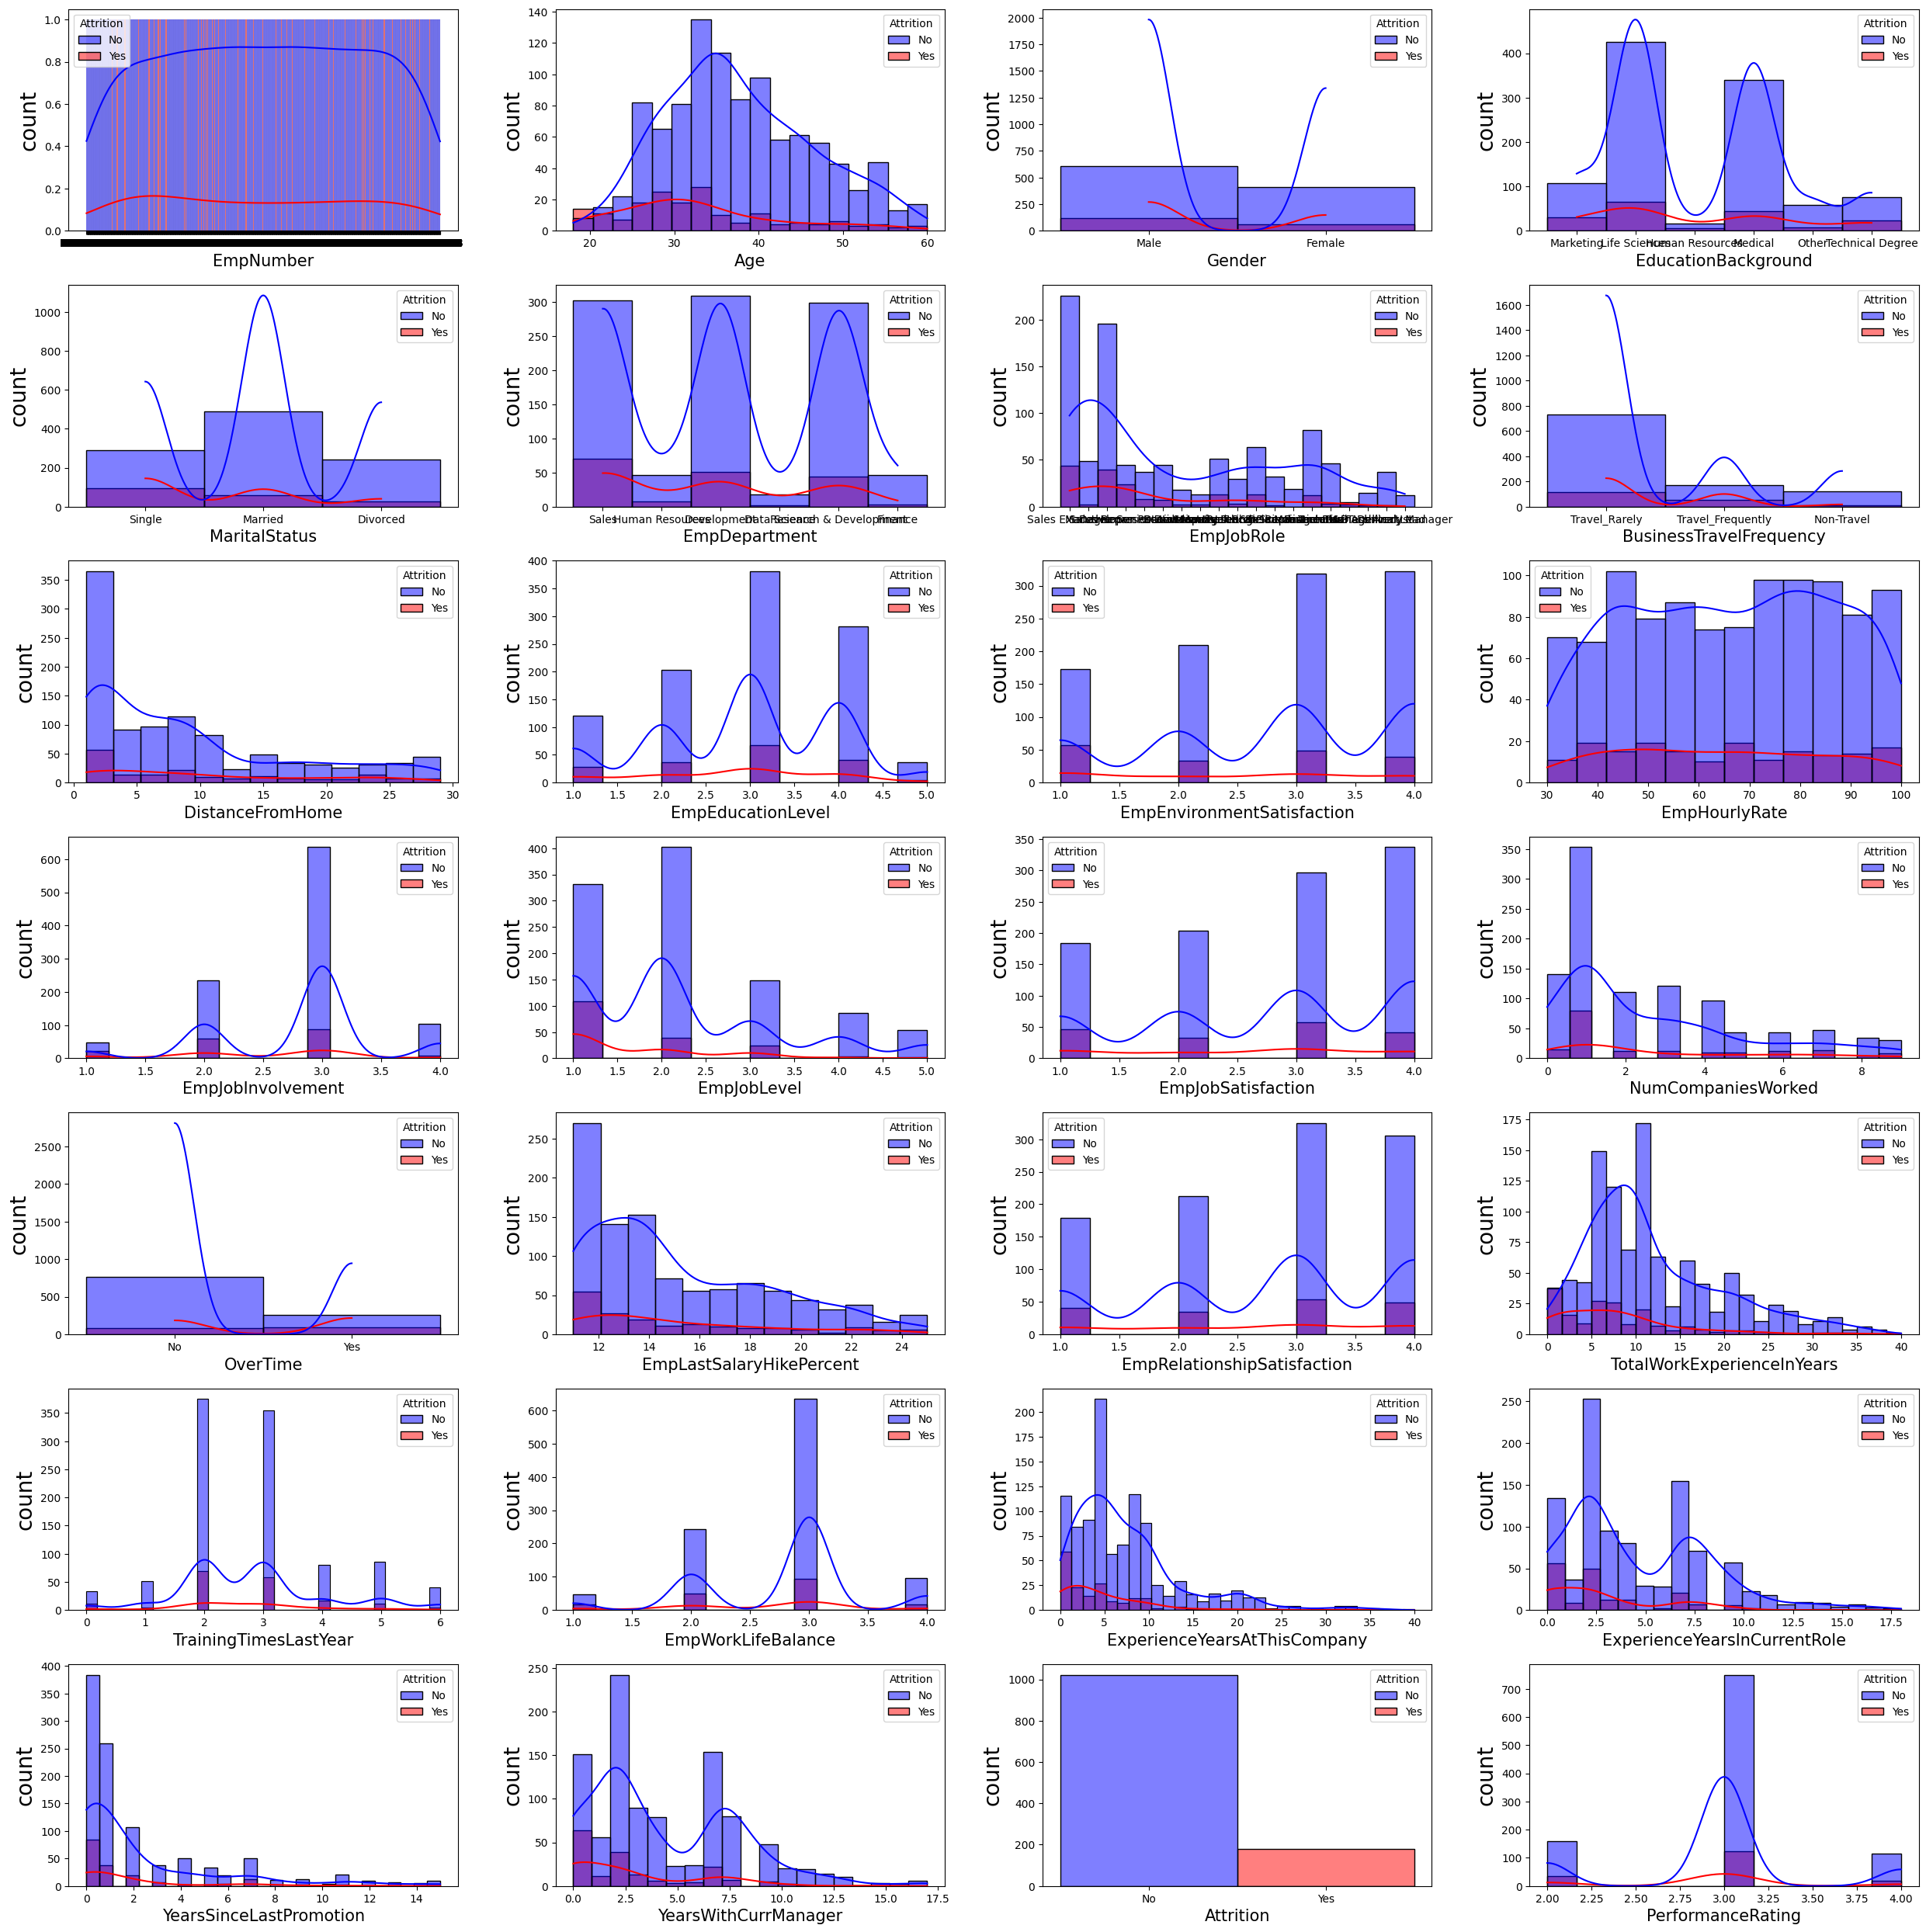

In [13]:
plt.figure(figsize=(25,25))
plot=1
for i in df:
    if plot<=30:
        ax=plt.subplot(7,4,plot)
        sns.histplot(x=df[i],hue=df["Attrition"],kde=True,palette=['Blue','Red'])
        plt.xlabel(i, fontsize=15)
        plt.ylabel('count', fontsize=20)

    plot +=1

plt.tight_layout()

**Bivariant analysis**

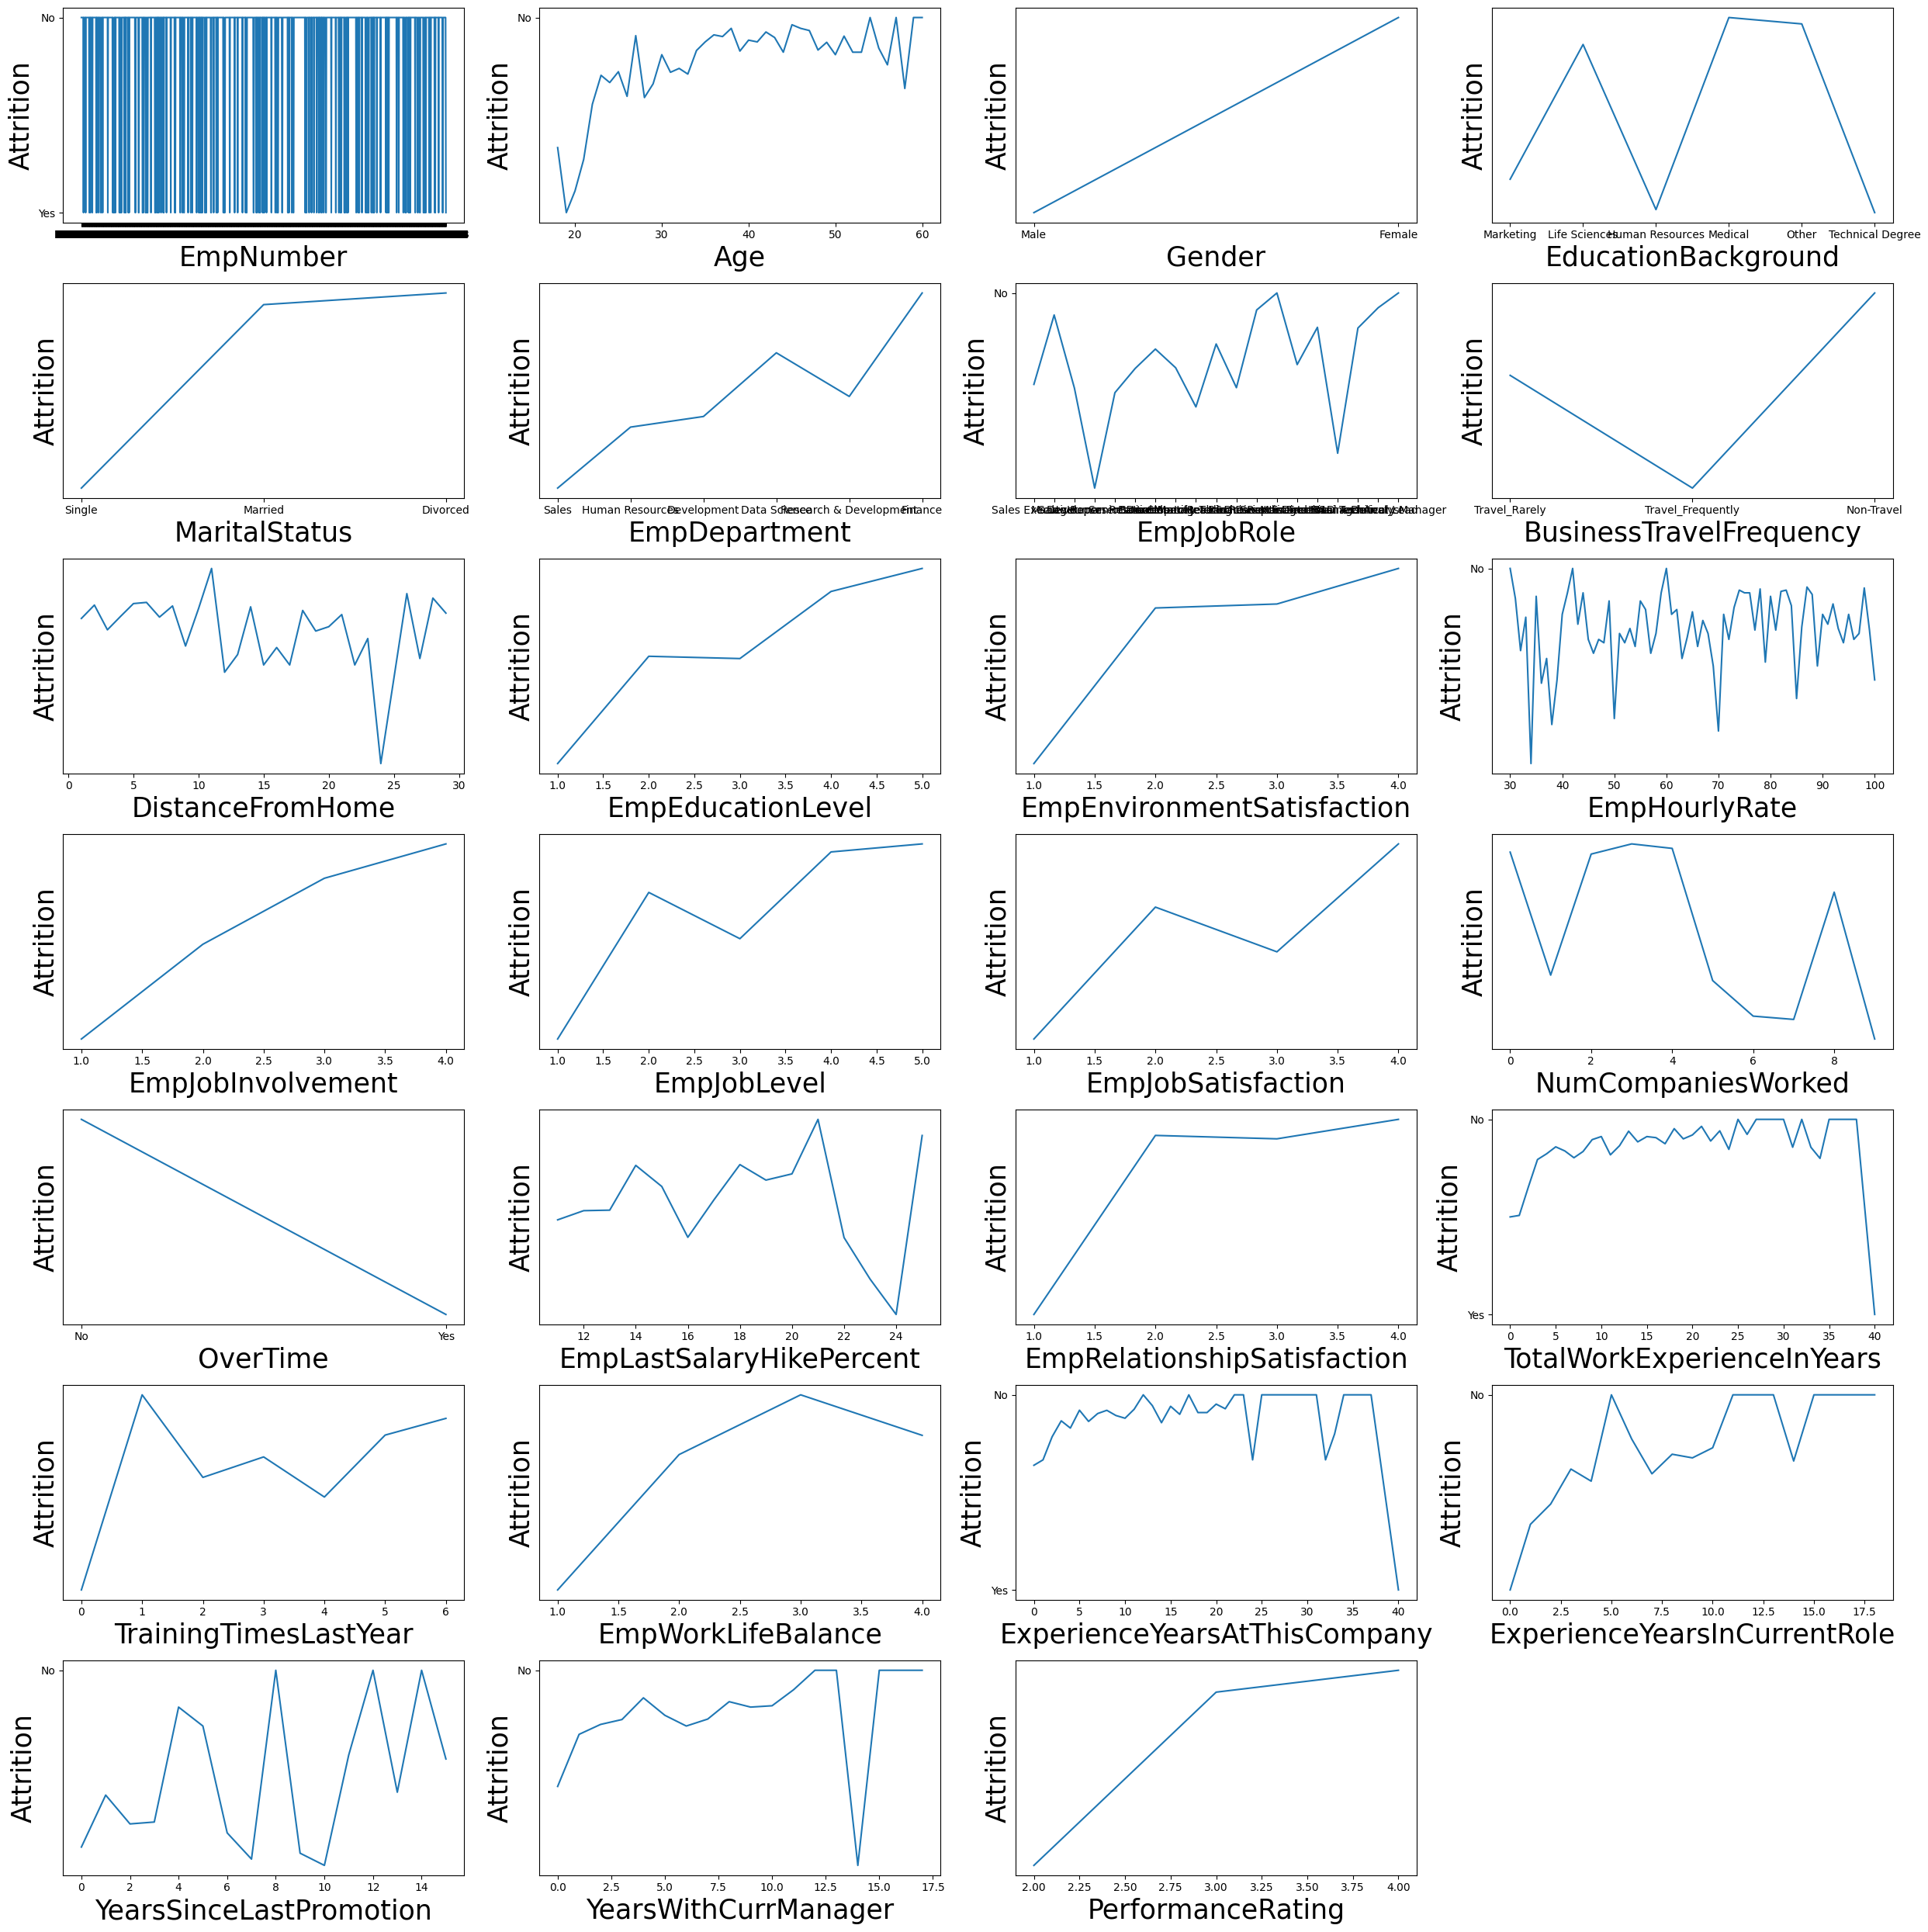

In [14]:
plt.figure(figsize=(25,25))
plot=1
for i in df.drop(["Attrition"],axis=1):
    if plot<=30:
        ax=plt.subplot(7,4,plot)
        sns.lineplot(x=df[i],y=df["Attrition"],ci=None)
        plt.xlabel(i, fontsize=25)
        plt.ylabel("Attrition", fontsize=25)
    plot+=1
plt.tight_layout()

**MARRIAGE VS ATTRITION**

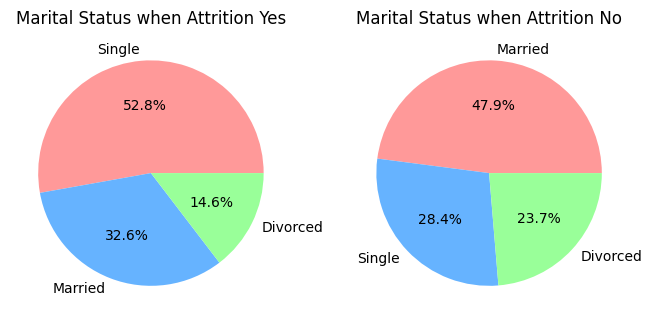

In [15]:
A_yes=df[df['Attrition']=='Yes']
A_no=df[df['Attrition']=='No']
myes=A_yes['MaritalStatus'].value_counts()
mno=A_no['MaritalStatus'].value_counts()
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.pie(myes, labels=myes.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Marital Status when Attrition Yes')

plt.subplot(1, 2, 2)
plt.pie(mno, labels=mno.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Marital Status when Attrition No')
plt.show()

**How education background,jobrole and employee department effect Attrition**

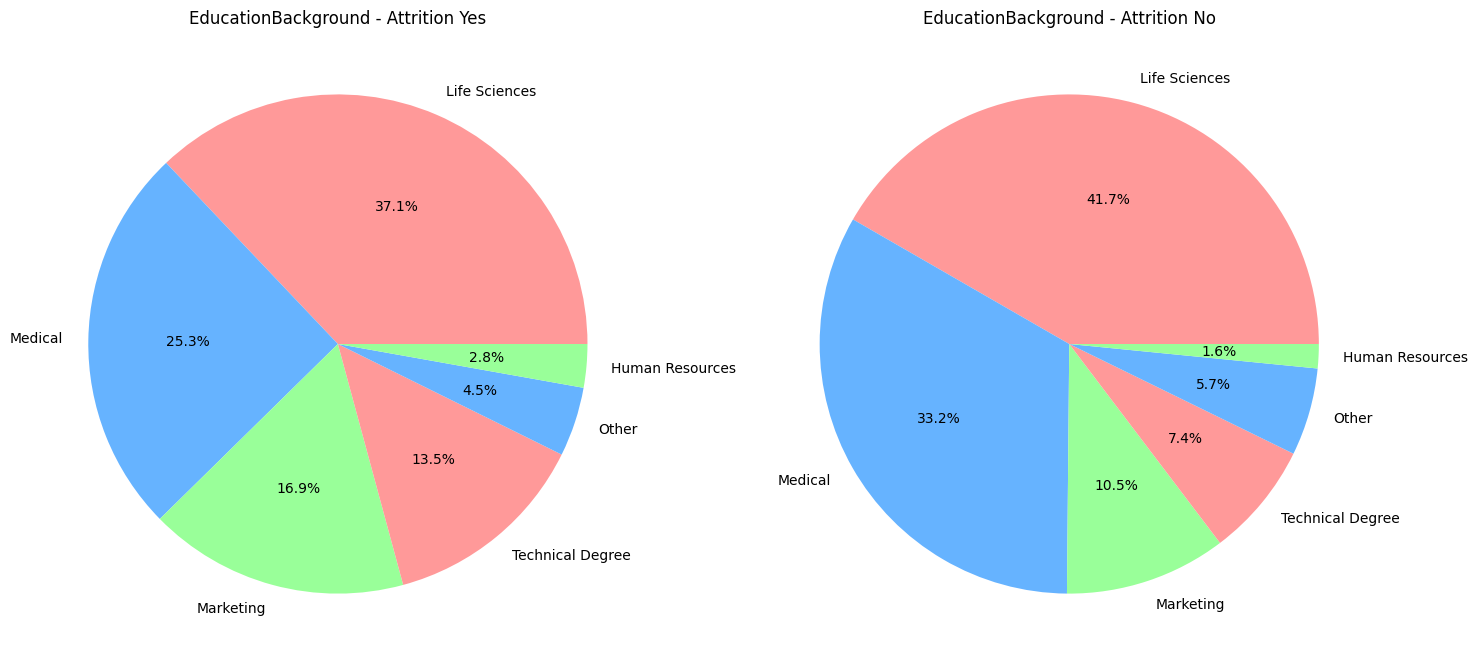

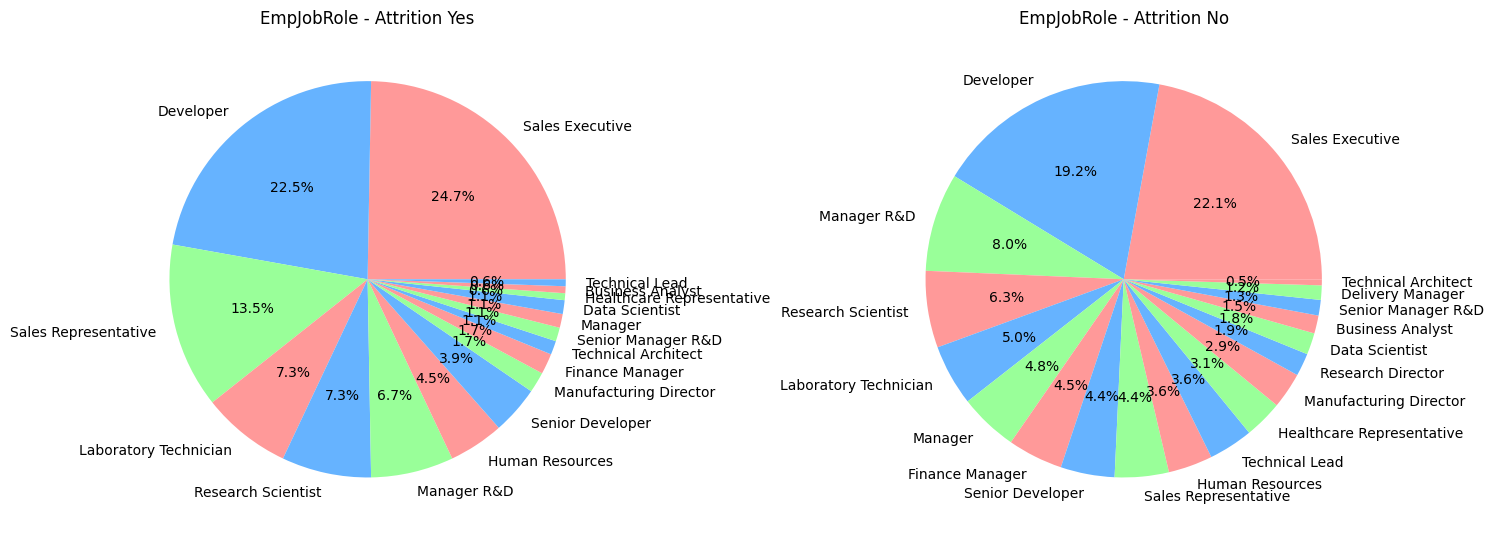

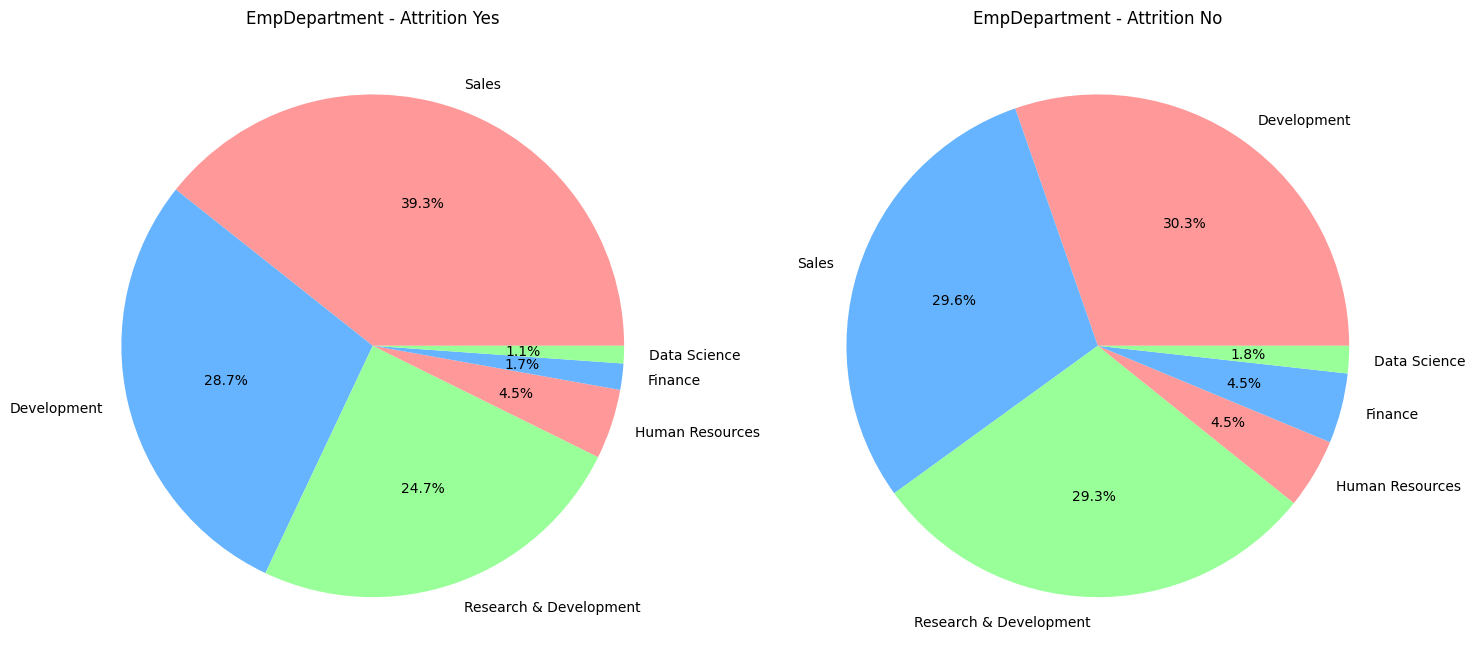

In [16]:
def plotpie(x, xsize, ysize):
    A_yes = df[df['Attrition'] == 'Yes']
    A_no = df[df['Attrition'] == 'No']
    myes = A_yes[x].value_counts()
    mno = A_no[x].value_counts()

    plt.figure(figsize=(xsize, ysize))

    plt.subplot(1, 2, 1)
    plt.pie(myes, labels=myes.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
    plt.title(f'{x} - Attrition Yes')

    plt.subplot(1, 2, 2)
    plt.pie(mno, labels=mno.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
    plt.title(f'{x} - Attrition No')

    plt.tight_layout()
    plt.show()

for feature in ['EducationBackground', 'EmpJobRole','EmpDepartment']:
    plotpie(feature, 15, 7)

**INSIGHTS BASED ON UNIVARIANT,BIVARIANT AND PIECHART  ANALYSIS  :**

##### - People below age group 25 has a tendancy to leave the job.
##### - Male group has more tendancy to leave the job than female.
##### - Employee with Education background in life science is tend to leave the job more and HR background least.
##### - Single employee tend to leave from the company than that of married and divorced
##### - Married employee likely to stay in the company than that of single and divorced
##### - Out of total number of employee leaving 24.7% employess job role is sales executive
##### - Out of total number of employee leaving least are from techincal lead,Business analyst,data scientist and healthcare representative.

**1.DEPARTMENT WISE PERFORMANCE**

****

##### - Out of total number of employees leaving the company 39.3% are from SALES department
##### - Out of total number of employees leaving the company 28.7% are from DEVELOPMEMT
##### - Out of total number of employees leaving the company 24.7% from RESEARCH AND DEVELOPMENT and least from Data science ,Finance and HR
***
##### - Out of total number of employees staying in the company 30.3% are from DEVELOPMENT department
##### - 29.6% from SALES
##### - 29.3% from RESEARCH AND DEVELOPMENT
***
**CONCLUSION**
##### - Therefore more employees from SALES department tend to leave and more employees from DEVELOPMENT department tend to stay in the company

# DATA PREPROCESSING

In [17]:
df.drop("EmpNumber",axis=1,inplace=True)

**Checking null values(None and nan values)**

In [18]:
df.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

**checking missing values any**

In [19]:
df.isnull().values.any()

False

In [20]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

In [21]:
(df == '').sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [22]:
(df == " ").sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

**NO NULL VALUES IN THE DATASET**

**CHECKING FOR DUPLICATES**

In [23]:
df.duplicated().sum()

0

**CHECKING FOR OUTLIERS**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

In [25]:
df1=df.select_dtypes(include="int")

In [26]:
df1.columns

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

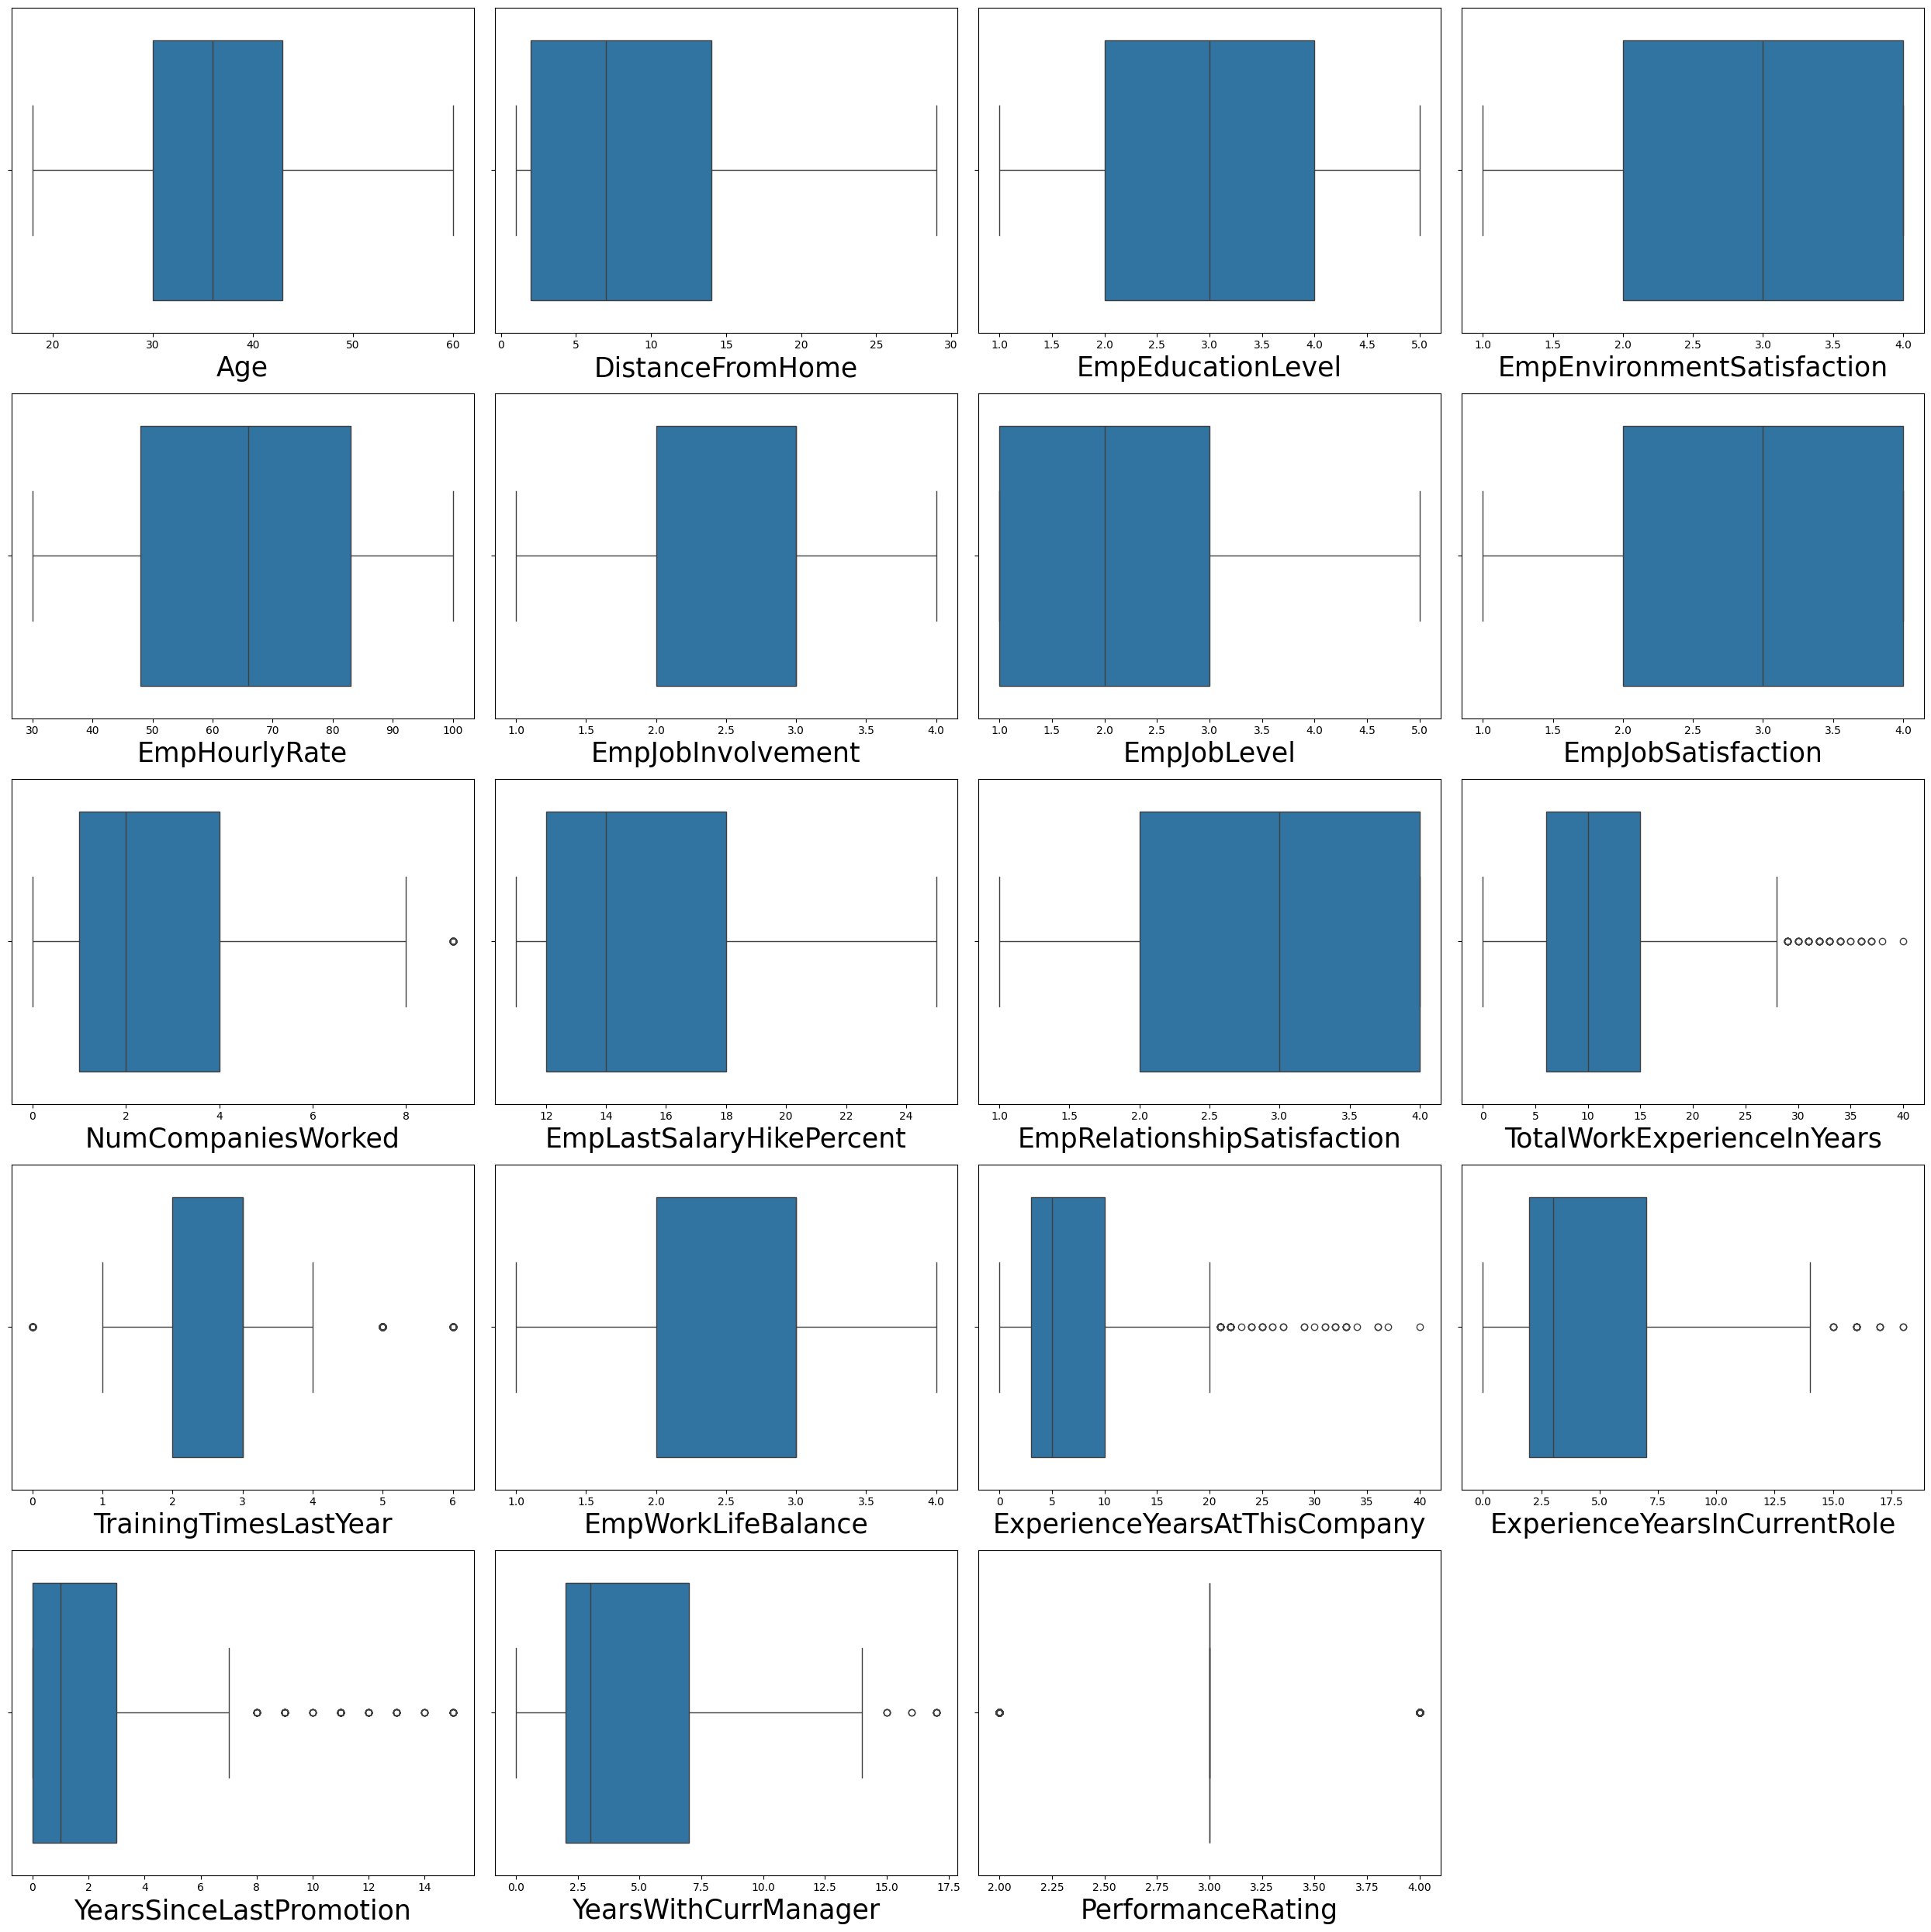

In [27]:
plt.figure(figsize=(25,25))
plot=1
for i in df1:
    if plot<=20:
        ax=plt.subplot(5,4,plot)
        sns.boxplot(x=df[i])
        plt.xlabel(i,fontsize=25)
    plot+=1
plt.tight_layout()

**for total work experience**

In [28]:
df.TotalWorkExperienceInYears.skew()

1.0868618597364565

**This is not normal distribution so replacing outliers with median using iqr method**

In [29]:
q1=df.TotalWorkExperienceInYears.quantile(0.25)
q3=df.TotalWorkExperienceInYears.quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr


In [30]:
len(df.loc[df["TotalWorkExperienceInYears"]>upper_limit])/len(df)

0.0425

#less than 5% of total data so replacing with median

In [31]:
df.loc[df["TotalWorkExperienceInYears"]>upper_limit,'TotalWorkExperienceInYears']=df['TotalWorkExperienceInYears'].median()

In [32]:
len(df.loc[df["TotalWorkExperienceInYears"]<lower_limit])/len(df)

0.0

**Outliers replaced with median**

**checking for TrainingTimesLastYear**

In [33]:
df.TrainingTimesLastYear.skew()

0.5320731985603981

**use 3 sigma rule**

In [34]:
lower_limit=df.TrainingTimesLastYear.mean()-3*df.TrainingTimesLastYear.std()
upper_lmit=df.TrainingTimesLastYear.mean()+3*df.TrainingTimesLastYear.std()

In [35]:
len(df.loc[df["TrainingTimesLastYear"]>upper_limit])/len(df)

0.0

In [36]:
len(df.loc[df["TrainingTimesLastYear"]<lower_limit])/len(df)

0.0

**nothing to replace**

**Checking for ExperienceYearsAtThisCompany**

In [37]:
df.ExperienceYearsAtThisCompany.skew()

1.789054979919473

In [38]:
q1=df.ExperienceYearsAtThisCompany.quantile(0.25)
q3=df.ExperienceYearsAtThisCompany.quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [39]:
len(df.loc[df["ExperienceYearsAtThisCompany"]>upper_limit])/len(df)

0.04666666666666667

In [40]:
df.loc[df["ExperienceYearsAtThisCompany"]>upper_limit,'ExperienceYearsAtThisCompany']=df['ExperienceYearsAtThisCompany'].median()

In [41]:
len(df.loc[df["ExperienceYearsAtThisCompany"]<lower_limit])/len(df)

0.0

In [42]:
df.ExperienceYearsInCurrentRole.skew()

0.8881586703270758

In [43]:
q1=df.ExperienceYearsInCurrentRole.quantile(0.25)
q3=df.ExperienceYearsInCurrentRole.quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [44]:
len(df.loc[df["ExperienceYearsInCurrentRole"]>upper_limit])/len(df)

0.013333333333333334

In [45]:
df.loc[df["ExperienceYearsInCurrentRole"]>upper_limit,'ExperienceYearsInCurrentRole']=df['ExperienceYearsInCurrentRole'].median()

In [46]:
len(df.loc[df["ExperienceYearsInCurrentRole"]<lower_limit])/len(df)

0.0

In [47]:
df.YearsSinceLastPromotion.skew()

1.9749315589155791

In [48]:
q1=df.YearsSinceLastPromotion.quantile(0.25)
q3=df.YearsSinceLastPromotion.quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [49]:
len(df.loc[df["YearsSinceLastPromotion"]>upper_limit])/len(df)

0.07333333333333333

#More than 5% so not handing it.

In [50]:
len(df.loc[df["YearsSinceLastPromotion"]<lower_limit])/len(df)

0.0

In [51]:
df.YearsWithCurrManager.skew()

0.8131582957766446

In [52]:
q1=df.YearsWithCurrManager.quantile(0.25)
q3=df.YearsWithCurrManager.quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [53]:
len(df.loc[df["YearsWithCurrManager"]>upper_limit])/len(df)

0.009166666666666667

In [54]:
df.loc[df["YearsWithCurrManager"]>upper_limit,'YearsWithCurrManager']=df['YearsWithCurrManager'].median()

In [55]:
len(df.loc[df["YearsWithCurrManager"]<lower_limit])/len(df)

0.0

**OUTLIERS ARE REPLACED**

# ENCODING

In [56]:
df.head()

Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0   32   Male           Marketing        Single            Sales   
1   47   Male           Marketing        Single            Sales   
2   40   Male       Life Sciences       Married            Sales   
3   41   Male     Human Resources      Divorced  Human Resources   
4   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
0                  3                           4  ...   
1                  4                           4  ...   
2                  4                           4  ...   
3                  4                           2  ...   
4                  4                           1  ...   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                             5   
4                      1                   3                             2   

  ExperienceYearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                            7                        0                     8   
1                            7                        1                     7   
2                           13                        1                    12   
3                            6                       12                     6   
4                            2                        2                     2   

   Attrition  PerformanceRating  
0         No                  3  
1         No                  3  
2         No                  4  
3         No                  3  
4         No                  3  

[5 rows x 27 columns]

In [57]:
df.select_dtypes(include="object")

Gender EducationBackground MaritalStatus    EmpDepartment  \
0       Male           Marketing        Single            Sales   
1       Male           Marketing        Single            Sales   
2       Male       Life Sciences       Married            Sales   
3       Male     Human Resources      Divorced  Human Resources   
4       Male           Marketing        Single            Sales   
...      ...                 ...           ...              ...   
1195  Female             Medical      Divorced            Sales   
1196    Male       Life Sciences        Single      Development   
1197    Male             Medical       Married      Development   
1198  Female             Medical        Single     Data Science   
1199  Female       Life Sciences        Single            Sales   

            EmpJobRole BusinessTravelFrequency OverTime Attrition  
0      Sales Executive           Travel_Rarely       No        No  
1      Sales Executive           Travel_Rarely       No        No  
2      Sales Executive       Travel_Frequently      Yes        No  
3              Manager           Travel_Rarely       No        No  
4      Sales Executive           Travel_Rarely       No        No  
...                ...                     ...      ...       ...  
1195   Sales Executive       Travel_Frequently      Yes        No  
1196  Senior Developer           Travel_Rarely       No        No  
1197  Senior Developer           Travel_Rarely      Yes        No  
1198    Data Scientist           Travel_Rarely       No        No  
1199   Sales Executive           Travel_Rarely       No       Yes  

[1200 rows x 8 columns]

**Applying one hot encoding for gender--NOMINAL DATA**

In [58]:
df2 = pd.get_dummies(df['Gender'],dtype = 'int',prefix='Gender',drop_first=True)
df = pd.concat([df,df2],axis=1).drop('Gender',axis=1)

In [59]:
df.EducationBackground.unique()

array(['Marketing', 'Life Sciences', 'Human Resources', 'Medical',
       'Other', 'Technical Degree'], dtype=object)

In [60]:
df2 = pd.get_dummies(df['EducationBackground'],dtype = 'int',prefix='EduBackground',drop_first=True)
df = pd.concat([df,df2],axis=1).drop('EducationBackground',axis=1)

In [61]:
df.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [62]:
df2 = pd.get_dummies(df['MaritalStatus'],dtype = 'int',prefix='MaritalStatus',drop_first=True)
df = pd.concat([df,df2],axis=1).drop('MaritalStatus',axis=1)

In [63]:
df.EmpDepartment.unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [64]:
df2 = pd.get_dummies(df['EmpDepartment'],dtype = 'int',prefix='EmpDepartment',drop_first=True)
df = pd.concat([df,df2],axis=1).drop('EmpDepartment',axis=1)

In [65]:
df.EmpJobRole.unique()

array(['Sales Executive', 'Manager', 'Developer', 'Sales Representative',
       'Human Resources', 'Senior Developer', 'Data Scientist',
       'Senior Manager R&D', 'Laboratory Technician',
       'Manufacturing Director', 'Research Scientist',
       'Healthcare Representative', 'Research Director', 'Manager R&D',
       'Finance Manager', 'Technical Architect', 'Business Analyst',
       'Technical Lead', 'Delivery Manager'], dtype=object)

In [66]:
df2 = pd.get_dummies(df['EmpJobRole'],dtype = 'int',prefix='EmpJobRole',drop_first=True)
df = pd.concat([df,df2],axis=1).drop('EmpJobRole',axis=1)

In [67]:
df.BusinessTravelFrequency.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [68]:
df2 = pd.get_dummies(df['BusinessTravelFrequency'],dtype = 'int',prefix='BusinessTravelFrequencye',drop_first=True)
df = pd.concat([df,df2],axis=1).drop('BusinessTravelFrequency',axis=1)

In [69]:
df.OverTime.unique()

array(['No', 'Yes'], dtype=object)

In [70]:
df2 = pd.get_dummies(df['OverTime'],dtype = 'int',prefix='OverTime',drop_first=True)
df = pd.concat([df,df2],axis=1).drop('OverTime',axis=1)

**Mapping Attrition "YES" and "NO" to 1 and 0 respectively**


In [71]:
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

In [72]:
df.head()

Age  DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0   32                10                  3                           4   
1   47                14                  4                           4   
2   40                 5                  4                           4   
3   41                10                  4                           2   
4   60                16                  4                           1   

   EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0             55                  3            2                   4   
1             42                  3            2                   1   
2             48                  2            3                   1   
3             73                  2            5                   4   
4             84                  3            2                   1   

   NumCompaniesWorked  EmpLastSalaryHikePercent  ...  \
0                   1                        12  ...   
1                   2                        12  ...   
2                   5                        21  ...   
3                   3                        15  ...   
4                   8                        14  ...   

   EmpJobRole_Research Scientist  EmpJobRole_Sales Executive  \
0                              0                           1   
1                              0                           1   
2                              0                           1   
3                              0                           0   
4                              0                           1   

   EmpJobRole_Sales Representative  EmpJobRole_Senior Developer  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                0                            0   

   EmpJobRole_Senior Manager R&D  EmpJobRole_Technical Architect  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   

   EmpJobRole_Technical Lead  BusinessTravelFrequencye_Travel_Frequently  \
0                          0                                           0   
1                          0                                           0   
2                          0                                           1   
3                          0                                           0   
4                          0                                           0   

   BusinessTravelFrequencye_Travel_Rarely  OverTime_Yes  
0                                       1             0  
1                                       1             0  
2                                       0             1  
3                                       1             0  
4                                       1             0  

[5 rows x 54 columns]

In [73]:
pd.set_option('display.max_columns', None)

In [74]:
df.head()

Age  DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0   32                10                  3                           4   
1   47                14                  4                           4   
2   40                 5                  4                           4   
3   41                10                  4                           2   
4   60                16                  4                           1   

   EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0             55                  3            2                   4   
1             42                  3            2                   1   
2             48                  2            3                   1   
3             73                  2            5                   4   
4             84                  3            2                   1   

   NumCompaniesWorked  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0                   1                        12                            4   
1                   2                        12                            4   
2                   5                        21                            3   
3                   3                        15                            2   
4                   8                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                             5                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
0                        0                     8          0   
1                        1                     7          0   
2                        1                    12          0   
3                       12                     6          0   
4                        2                     2          0   

   PerformanceRating  Gender_Male  EduBackground_Life Sciences  \
0                  3            1                            0   
1                  3            1                            0   
2                  4            1                            1   
3                  3            1                            0   
4                  3            1                            0   

   EduBackground_Marketing  EduBackground_Medical  EduBackground_Other  \
0                        1                      0                    0   
1                        1                      0                    0   
2                        0                      0                    0   
3                        0                      0                    0   
4                        1                      0                    0   

   EduBackground_Technical Degree  MaritalStatus_Married  \
0                               0                      0   
1                               0                      0   
2                               0                      1   
3                               0                      0   
4                               0                      0   

   MaritalStatus_Single  EmpDepartment_Development  EmpDepartment_Finance  \
0                     1                          0                      0   
1                     1                          0    

# SCALING

In [75]:
df.columns

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating', 'Gender_Male',
       'EduBackground_Life Sciences', 'EduBackground_Marketing',
       'EduBackground_Medical', 'EduBackground_Other',
       'EduBackground_Technical Degree', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'EmpDepartment_Development',
       'EmpDepartment_Finance', 'EmpDepartment_Human Resources',
       'EmpDepartment_Research & Development', 'EmpDepartment_Sales',
       'EmpJobRole_Data Scientist', 'EmpJobRole_Delivery Manager',
       'EmpJobRole_De

In [76]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [77]:
df[['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating']]=sc.fit_transform(df[['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating']])

In [78]:
df.head()

Age  DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0  0.333333          0.321429               0.50                    1.000000   
1  0.690476          0.464286               0.75                    1.000000   
2  0.523810          0.142857               0.75                    1.000000   
3  0.547619          0.321429               0.75                    0.333333   
4  1.000000          0.535714               0.75                    0.000000   

   EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0       0.357143           0.666667         0.25                 1.0   
1       0.171429           0.666667         0.25                 0.0   
2       0.257143           0.333333         0.50                 0.0   
3       0.614286           0.333333         1.00                 1.0   
4       0.771429           0.666667         0.25                 0.0   

   NumCompaniesWorked  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0            0.111111                  0.071429                     1.000000   
1            0.222222                  0.071429                     1.000000   
2            0.555556                  0.714286                     0.666667   
3            0.333333                  0.285714                     0.333333   
4            0.888889                  0.214286                     1.000000   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                    0.357143               0.333333            0.333333   
1                    0.714286               0.333333            0.666667   
2                    0.714286               0.333333            0.666667   
3                    0.821429               0.333333            0.333333   
4                    0.357143               0.166667            0.666667   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                          0.50                      0.500000   
1                          0.35                      0.500000   
2                          0.90                      0.928571   
3                          0.25                      0.428571   
4                          0.10                      0.142857   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
0                 0.000000              0.571429          0   
1                 0.066667              0.500000          0   
2                 0.066667              0.857143          0   
3                 0.800000              0.428571          0   
4                 0.133333              0.142857          0   

   PerformanceRating  Gender_Male  EduBackground_Life Sciences  \
0                0.5            1                            0   
1                0.5            1                            0   
2                1.0            1                            1   
3                0.5            1                            0   
4                0.5            1                            0   

   EduBackground_Marketing  EduBackground_Medical  EduBackground_Other  \
0                        1                      0                    0   
1                        1                      0                    0   
2                        0                      0                    0   
3                        0                      0                    0   
4                        1                      0                    0   

   EduBackground_Technical Degree  MaritalStatus_Married  \
0                               0                      0   
1                               0                      0   
2                               0                      1   
3                               0                      0   
4                               0                      0   

   MaritalStatus_Single  EmpDepartment_Development  EmpDepartment_Finance  \
0                     1                          0                      0   
1                     1      

# FEATURE ENGINEERING

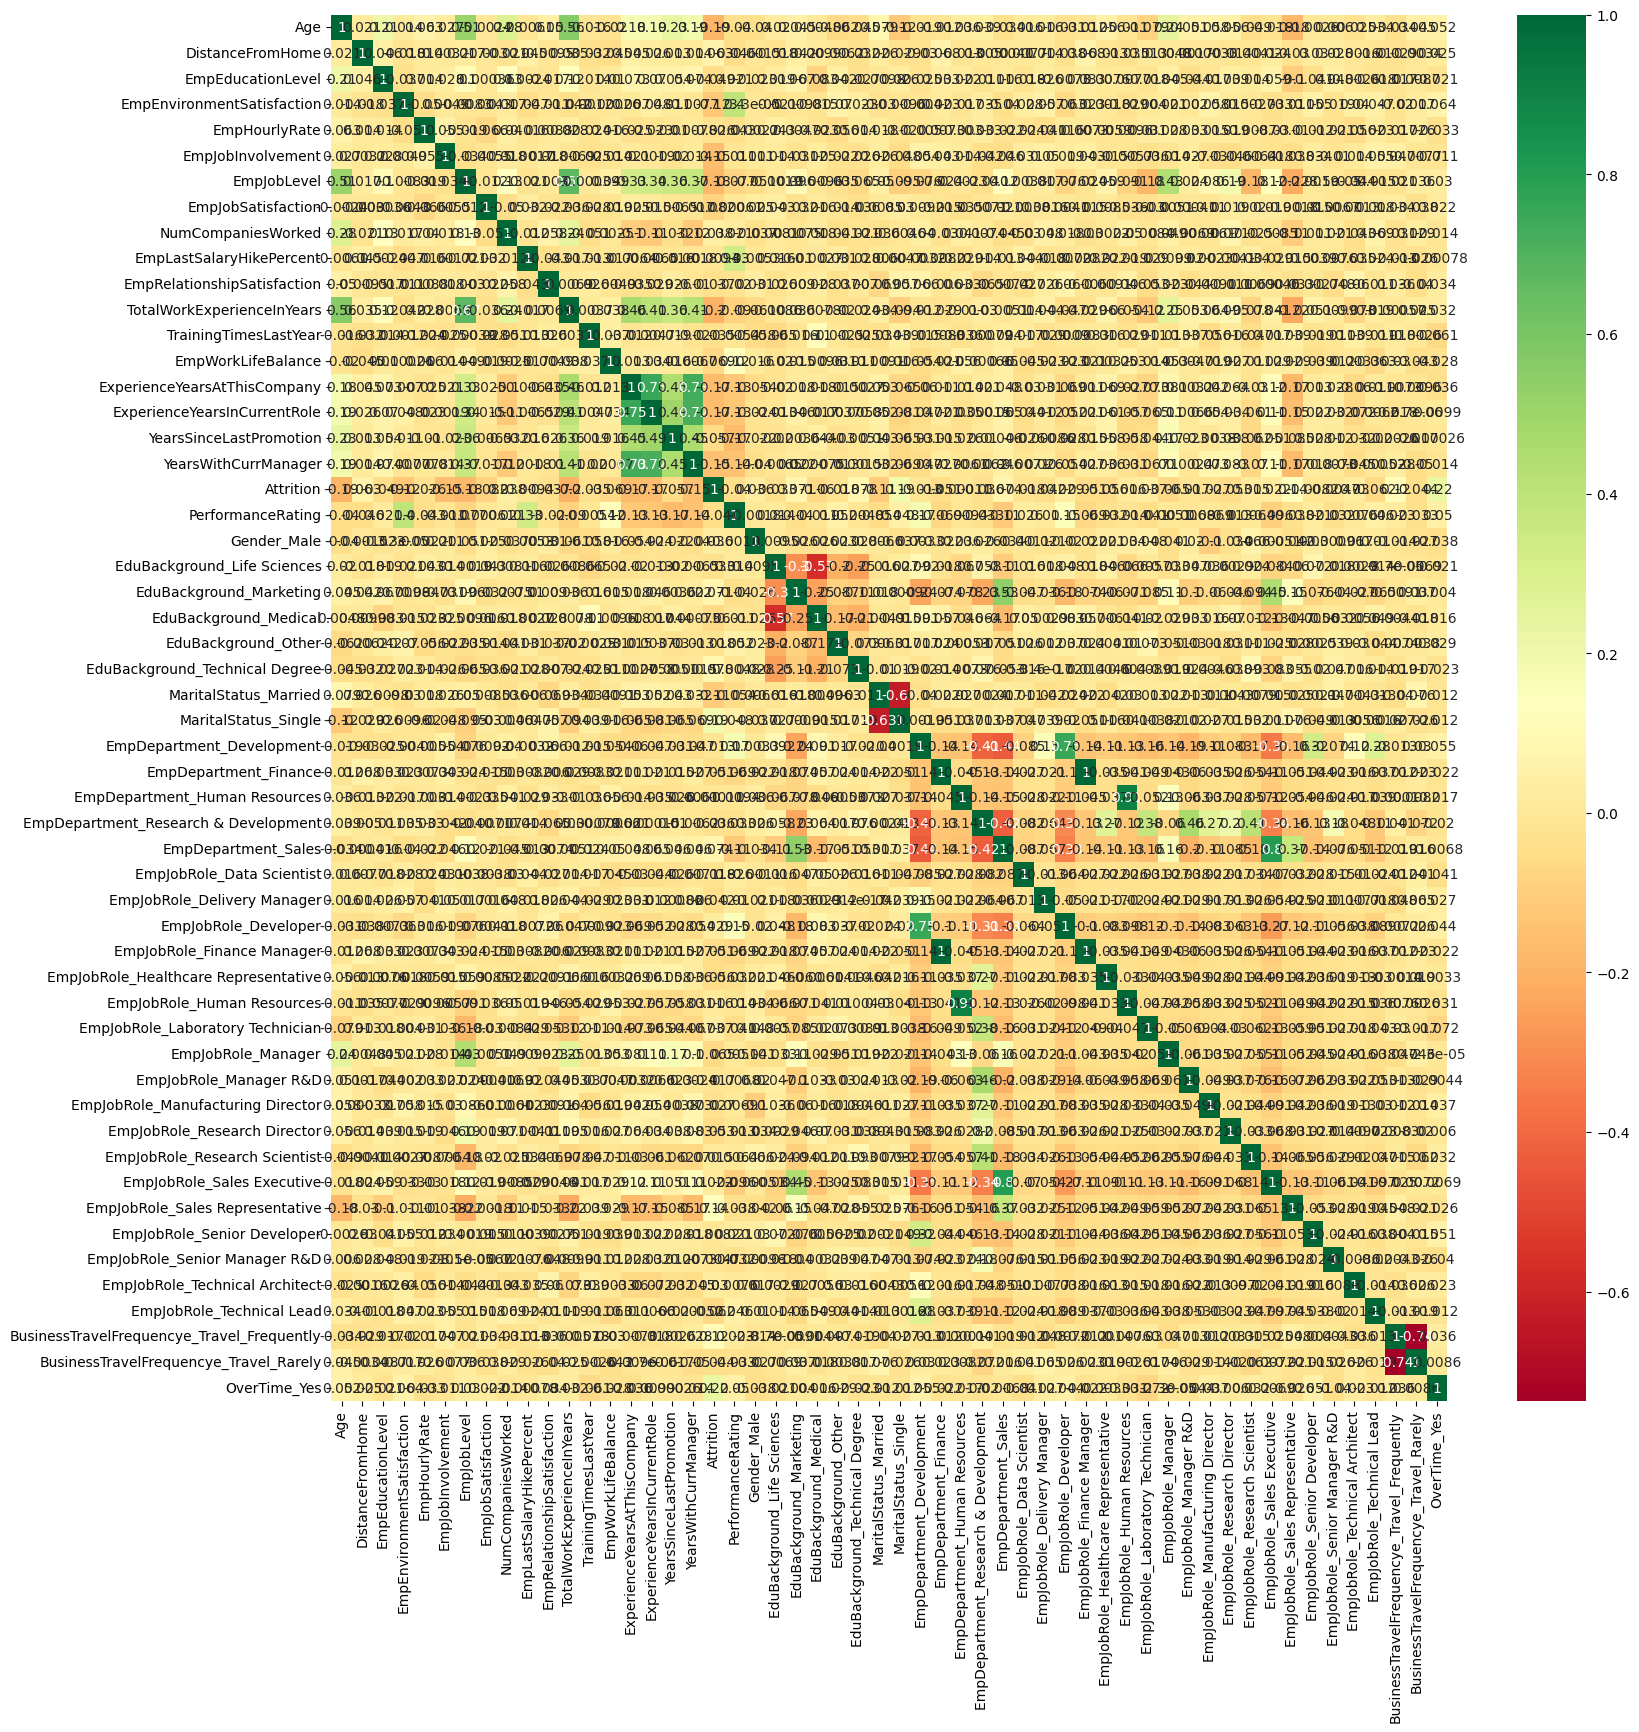

In [79]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [80]:
pearson_corr = df['EmpDepartment_Finance'].corr(df['EmpJobRole_Finance Manager'], method='pearson')
print(f"Pearson Correlation: {pearson_corr}")

# Calculate Spearman correlation
spearman_corr = df['EmpDepartment_Finance'].corr(df['EmpJobRole_Finance Manager'], method='spearman')
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: 1.0
Spearman Correlation: 1.0


**Both features are highly correlated so selected one of them and drop other**

**Comparing correlation with target to know which feature to drop**

In [81]:
df['EmpDepartment_Finance'].corr(df['Attrition'])

-0.050567143720468624

In [82]:
df['EmpJobRole_Finance Manager'].corr(df['Attrition'])

-0.050567143720468624

In [83]:
#both are having same corr with target so dropping any one of the them

In [84]:
df.drop(["EmpJobRole_Finance Manager"],axis=1,inplace=True)

**checking for emp department and job role in finance sector**

In [85]:
pearson_corr = df['EmpDepartment_Human Resources'].corr(df['EmpJobRole_Human Resources'], method='pearson')
print(f"Pearson Correlation: {pearson_corr}")

# Calculate Spearman correlation
spearman_corr = df['EmpDepartment_Human Resources'].corr(df['EmpJobRole_Human Resources'], method='spearman')
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: 0.9093073335456101
Spearman Correlation: 0.9093073335456099


In [86]:
df['EmpDepartment_Human Resources'].corr(df['Attrition'])

-0.00011309843834679169

In [87]:
df['EmpJobRole_Human Resources'].corr(df['Attrition'])

0.016351757064787004

**Dropping column "EmpDepartment_Human Resources" since it is less correlated compare to "EmpJobRole_Human Resources"**


In [88]:
df.drop(["EmpDepartment_Human Resources"],axis=1,inplace=True)

**Checking for department sales**

In [89]:
df['EmpDepartment_Sales'].corr(df['EmpJobRole_Sales Executive'])

0.8023036106293054

In [90]:
df['EmpDepartment_Sales'].corr(df['Attrition'])

0.07432211804879173

In [91]:
df['EmpJobRole_Sales Executive'].corr(df['Attrition'])

0.022177854824163793

In [92]:
#dropping "EmpJobRole_Sales Executive"

In [93]:
df.drop(["EmpJobRole_Sales Executive"],axis=1,inplace=True)

**checking for Experience in the comapny and current role**

In [94]:
df['ExperienceYearsAtThisCompany'].corr(df['ExperienceYearsInCurrentRole'])

0.7495088169312639

In [95]:
pearson_corr = df['ExperienceYearsAtThisCompany'].corr(df['ExperienceYearsInCurrentRole'], method='pearson')
print(f"Pearson Correlation: {pearson_corr}")

# Calculate Spearman correlation
spearman_corr = df['ExperienceYearsAtThisCompany'].corr(df['ExperienceYearsInCurrentRole'], method='spearman')
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: 0.7495088169312639
Spearman Correlation: 0.8251462475254399


In [96]:
df['ExperienceYearsAtThisCompany'].corr(df['Attrition'])

-0.1721505563410199

In [97]:
df['ExperienceYearsInCurrentRole'].corr(df['Attrition'])

-0.16620946099886327

In [98]:
df.drop(["ExperienceYearsAtThisCompany"],axis=1,inplace=True)

**Checking between EmpJobRole_Developer and EmpDepartment_Development**

In [99]:
pearson_corr = df['EmpJobRole_Developer'].corr(df['EmpDepartment_Development'], method='pearson')
print(f"Pearson Correlation: {pearson_corr}")

# Calculate Spearman correlation
spearman_corr = df['EmpJobRole_Developer'].corr(df['EmpDepartment_Development'], method='spearman')
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: 0.7543013135370868
Spearman Correlation: 0.7543013135370868


In [100]:
df['EmpJobRole_Developer'].corr(df['Attrition'])

0.029453834160582226

In [101]:
df['EmpDepartment_Development'].corr(df['Attrition'])

-0.013027691046327245

In [102]:
df.drop(["EmpDepartment_Development"],axis=1,inplace=True)

In [103]:
df.head()

Age  DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0  0.333333          0.321429               0.50                    1.000000   
1  0.690476          0.464286               0.75                    1.000000   
2  0.523810          0.142857               0.75                    1.000000   
3  0.547619          0.321429               0.75                    0.333333   
4  1.000000          0.535714               0.75                    0.000000   

   EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0       0.357143           0.666667         0.25                 1.0   
1       0.171429           0.666667         0.25                 0.0   
2       0.257143           0.333333         0.50                 0.0   
3       0.614286           0.333333         1.00                 1.0   
4       0.771429           0.666667         0.25                 0.0   

   NumCompaniesWorked  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0            0.111111                  0.071429                     1.000000   
1            0.222222                  0.071429                     1.000000   
2            0.555556                  0.714286                     0.666667   
3            0.333333                  0.285714                     0.333333   
4            0.888889                  0.214286                     1.000000   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                    0.357143               0.333333            0.333333   
1                    0.714286               0.333333            0.666667   
2                    0.714286               0.333333            0.666667   
3                    0.821429               0.333333            0.333333   
4                    0.357143               0.166667            0.666667   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                      0.500000                 0.000000   
1                      0.500000                 0.066667   
2                      0.928571                 0.066667   
3                      0.428571                 0.800000   
4                      0.142857                 0.133333   

   YearsWithCurrManager  Attrition  PerformanceRating  Gender_Male  \
0              0.571429          0                0.5            1   
1              0.500000          0                0.5            1   
2              0.857143          0                1.0            1   
3              0.428571          0                0.5            1   
4              0.142857          0                0.5            1   

   EduBackground_Life Sciences  EduBackground_Marketing  \
0                            0                        1   
1                            0                        1   
2                            1                        0   
3                            0                        0   
4                            0                        1   

   EduBackground_Medical  EduBackground_Other  EduBackground_Technical Degree  \
0                      0                    0                               0   
1                      0                    0                               0   
2                      0                    0                               0   
3                      0                    0                               0   
4                      0                    0                               0   

   MaritalStatus_Married  MaritalStatus_Single  EmpDepartment_Finance  \
0                      0                     1                      0   
1                      0                     1                      0   
2                      1                     0                      0   
3                      0                     0                      0   
4                      0                     1                      0   

   EmpDepartment_Research & Development  EmpDepartment_Sales  \
0                            

**Q2.Top 3 features effecting employee performance**

In [104]:

correlation_matrix = df.corr()
attrition_correlation = correlation_matrix['Attrition'].drop('Attrition')  # Exclude self-correlation

# Finding top 3 features with highest absolute correlation
top_features = attrition_correlation.abs().sort_values(ascending=False).head(3)

print("Top 3 Features Affecting Attrition:")
print(top_features)

Top 3 Features Affecting Attrition:
OverTime_Yes                  0.224535
TotalWorkExperienceInYears    0.200169
Age                           0.189317
Name: Attrition, dtype: float64


In [105]:
correlation_matrix = df.corr()
performance_correlation = correlation_matrix['PerformanceRating'].drop('PerformanceRating')  # Exclude self-correlation

top_features = performance_correlation.abs().sort_values(ascending=False).head(3)

print("Top 3 Features Affecting employee performance:")
print(top_features)

Top 3 Features Affecting employee performance:
EmpEnvironmentSatisfaction    0.395561
EmpLastSalaryHikePercent      0.333722
YearsSinceLastPromotion       0.167629
Name: PerformanceRating, dtype: float64


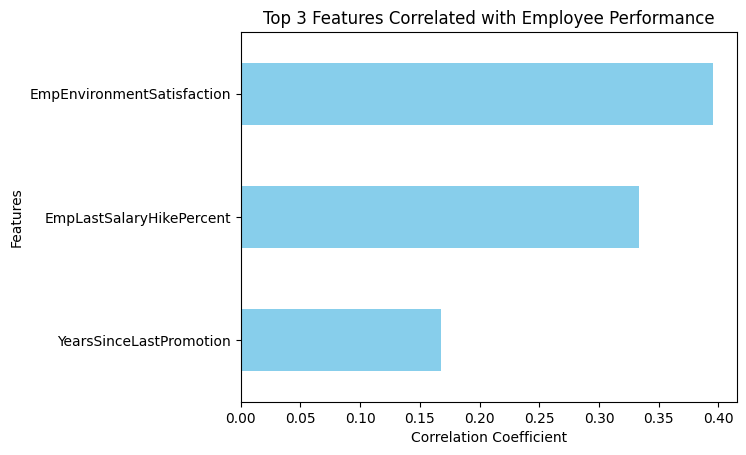

In [106]:
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 3 Features Correlated with Employee Performance')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


**Selected most relevant features**

# MODEL CREATION

**Split X and Y**

In [107]:
x=df.drop("Attrition",axis=1)
y=df.Attrition

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [109]:
x.shape

(1200, 48)

In [110]:
x_train.shape

(840, 48)

In [111]:
x_test.shape

(360, 48)

In [112]:
y_train.shape

(840,)

In [113]:
y_test.shape

(360,)

In [114]:
y_train.value_counts()

Attrition
0    717
1    123
Name: count, dtype: int64

# OVER SAMPLNG USING SMOTE

In [115]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [116]:
x_smote,y_smote=sm.fit_resample(x_train,y_train)

In [117]:
y_smote.value_counts()

Attrition
0    717
1    717
Name: count, dtype: int64

# MODEL 1:LOGISTIC REGRESSION

In [118]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [119]:
model_lr=lr.fit(x_smote,y_smote)

In [120]:
y_predict_lr=model_lr.predict(x_test)

In [121]:
y_predtrain_lr=model_lr.predict(x_smote)

# EVALUATION

In [122]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

**Training accuracy**

In [123]:
accuracy_score(y_smote,y_predtrain_lr)

0.8542538354253836

In [124]:
f1_score(y_smote,y_predtrain_lr)

0.8535388927820603

In [125]:
print(classification_report(y_smote,y_predtrain_lr))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       717
           1       0.86      0.85      0.85       717

    accuracy                           0.85      1434
   macro avg       0.85      0.85      0.85      1434
weighted avg       0.85      0.85      0.85      1434



**Training accuracy is 84%**

In [126]:
accuracy_score(y_test,y_predict_lr)

0.7722222222222223

In [127]:
f1_score(y_test,y_predict_lr)

0.4605263157894737

In [128]:
print(classification_report(y_test,y_predict_lr))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       305
           1       0.36      0.64      0.46        55

    accuracy                           0.77       360
   macro avg       0.64      0.72      0.66       360
weighted avg       0.84      0.77      0.80       360



**Testing accuracy is 78%**

# ROC AND AUC

In [129]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_predict_lr)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.7165424739195231


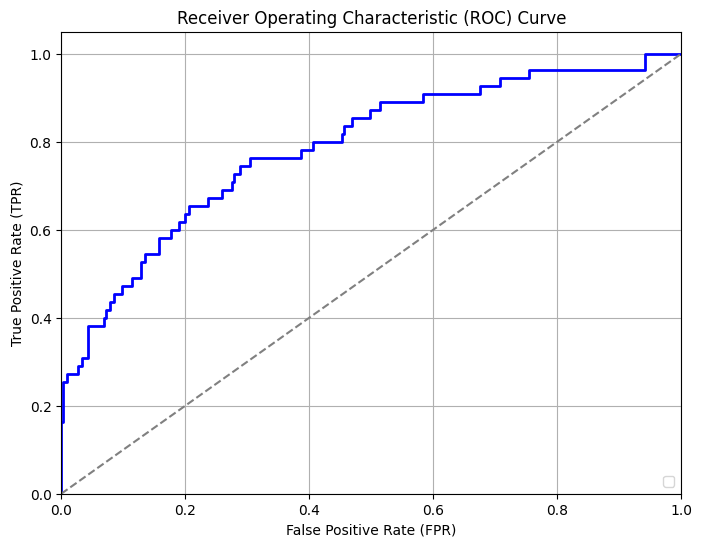

In [130]:
y_probs = model_lr.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Ploting diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# MODEL 2:SUPPORT VECTOR MACHINE

In [131]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(x_smote,y_smote)

SVC()

In [132]:
y_predict_svc=model_svc.predict(x_test)
y_predtrain_svc=model_svc.predict(x_smote)

In [133]:
accuracy_score(y_smote,y_predtrain_svc)

0.9574616457461645

In [134]:
f1_score(y_smote,y_predtrain_svc)

0.9573128061581525

In [135]:
print(classification_report(y_smote,y_predtrain_svc))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       717
           1       0.96      0.95      0.96       717

    accuracy                           0.96      1434
   macro avg       0.96      0.96      0.96      1434
weighted avg       0.96      0.96      0.96      1434



**Training accuracy is 95%**

In [136]:
accuracy_score(y_test,y_predict_svc)

0.8194444444444444

In [137]:
f1_score(y_test,y_predict_svc)

0.4247787610619469

In [138]:
print(classification_report(y_test,y_predict_svc))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       305
           1       0.41      0.44      0.42        55

    accuracy                           0.82       360
   macro avg       0.66      0.66      0.66       360
weighted avg       0.82      0.82      0.82       360



**Testing accuracy is 84%**

# HYPER PARAMETR TUNING

In [139]:
param_grid = {'C':[1,5,10,50,60,70],'gamma':[0.1,0.01,0.001,0.02,0.032,0.001],'random_state':list(range(1,20))}

In [140]:
from sklearn.model_selection import GridSearchCV

# Define parameters range
param_grid = {"C":[0.1,5,10,50,60,70],
              "gamma":[1,0.1,0.01,0.001,0.0001]}
model = SVC()
grid = GridSearchCV(model, param_grid, refit=True, verbose=2, scoring="f1", cv=5)

# Fit the model for GridSearchCV
grid.fit(x,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.2s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END .....................................C=0.1, gamma=1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=2)

In [141]:
print(grid.best_params_)

{'C': 60, 'gamma': 0.01}


In [142]:
clf = SVC(C=60, gamma=0.01)

In [143]:
clf.fit(x_smote,y_smote)

SVC(C=60, gamma=0.01)

In [144]:
y_pred_svc1 = clf.predict(x_test)

In [145]:
accuracy_score(y_test,y_pred_svc1)

0.8111111111111111

In [146]:
y_predtr_svc1=clf.predict(x_smote)
accuracy_score(y_smote,y_predtr_svc1)

0.9086471408647141

**After tuning testing accuracy was 84% and training accuracy was 91%**

# MODEL 3:  DECISION TREE

In [147]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_smote,y_smote)

DecisionTreeClassifier()

In [148]:
y_predict_dc=dc.predict(x_test)
y_predtrain_dc=dc.predict(x_smote)

In [149]:
accuracy_score(y_test,y_predict_dc)

0.7694444444444445

In [150]:
f1_score(y_test,y_predict_dc)

0.336

In [151]:
print(classification_report(y_test,y_predict_dc))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       305
           1       0.30      0.38      0.34        55

    accuracy                           0.77       360
   macro avg       0.59      0.61      0.60       360
weighted avg       0.79      0.77      0.78       360



In [152]:
accuracy_score(y_smote,y_predtrain_dc)

1.0

**Overfiiting since training accuracy is 100%**

# HYPER PARAMETR TUNING

In [153]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion" : ["gini","entropy"],
    "splitter" : ["best","random"],
    "max_depth" : [None,5,10,15],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

tree_clf = DecisionTreeClassifier(random_state=3)

tree_cv = GridSearchCV(estimator=tree_clf, param_grid=params, cv=5)

tree_cv.fit(x_smote,y_smote)

best_params = tree_cv.best_params_

print(f"Best paramters: {best_params})")

Best paramters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})


In [154]:
dt1 = DecisionTreeClassifier(criterion="entropy", max_depth= None, min_samples_leaf=1, min_samples_split=2, splitter="best")
dt1.fit(x_smote,y_smote)

DecisionTreeClassifier(criterion='entropy')

In [155]:
y_pred_dt1 = dt1.predict(x_test)
y_predtrain_dt1=dt1.predict(x_smote)

In [156]:
accuracy_score(y_test,y_pred_dt1)

0.8027777777777778

In [157]:
accuracy_score(y_smote,y_predtrain_dt1)

1.0

**After tuninng also model overfits**

# Model 4:RANDOM FOREST

In [158]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=100) #100 DT
rf_clf.fit(x_smote,y_smote)

RandomForestClassifier()

In [159]:
y_predictRF=rf_clf.predict(x_test)
y_predtrainRF=rf_clf.predict(x_smote)

In [160]:
accuracy_score(y_smote,y_predtrainRF)

1.0

In [161]:
accuracy_score(y_test,y_predictRF)

0.8638888888888889

**Overfits so goes for tuning**

# HYPER PARAMETR TUNING

In [162]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)] # It takes 10 numbers between 200 to 2000 in equal diff.
max_features = ["auto", "sqrt"]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)] # It takes 11 numbers between 10 to 110 in equal size.
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]

In [163]:
random_grid = {"n_estimators" : n_estimators,
               "max_features" : max_features,
               "max_depth" : max_depth,
               "min_samples_split" : min_samples_split,
               "min_samples_leaf" : min_samples_leaf,
               "bootstrap" : bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf_clf1,
                           scoring='f1',
                           param_distributions=random_grid,
                           n_iter=100,
                           cv=3,
                           verbose=2,
                           random_state=42,
                           n_jobs=-1)

rf_cv.fit(x_smote,y_smote)

rf_best_params = rf_cv.best_params_
print(f"Best paramters : {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters : {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False})


In [164]:
rf=RandomForestClassifier(n_estimators= 400, min_samples_split= 2, min_samples_leaf= 1, max_features='sqrt', max_depth= None, bootstrap=False)
rf.fit(x_smote,y_smote)

RandomForestClassifier(bootstrap=False, n_estimators=400)

In [165]:
y_trf=rf.predict(x_smote)#training
accuracy_score(y_smote,y_trf)

1.0

In [166]:
y_pred_rf1 = rf.predict(x_test)
accuracy_score(y_test,y_pred_rf1)

0.8555555555555555

**Overfits**

# Model 5:- GradientBoostingClassifier

In [167]:
from sklearn.ensemble import GradientBoostingClassifier
gbcls = GradientBoostingClassifier()
gbcls.fit(x_smote,y_smote)
y_pred_gb = gbcls.predict(x_test)

In [168]:
y_tr=gbcls.predict(x_smote)
accuracy_score(y_smote,y_tr)

0.9804741980474198

In [169]:
accuracy_score(y_test,y_pred_gb)

0.8583333333333333

In [170]:
f1_score(y_test,y_pred_gb)

0.4631578947368421

**Training accuracy is 97% and testing accuracy is 87.5%**

# Model 6:- XGBoost

In [171]:
from xgboost import XGBClassifier
xgb_r= XGBClassifier()
xgb_r.fit(x_smote,y_smote)
y_pred_xgb=xgb_r.predict(x_test)

In [172]:
y_pred_train_xgb=xgb_r.predict(x_smote)
accuracy_score(y_smote,y_pred_train_xgb)

1.0

In [173]:
accuracy_score(y_test,y_pred_xgb)

0.8611111111111112

In [174]:
#overfits

# HYPER PARAMETR TUNING

In [175]:
from sklearn.model_selection import RandomizedSearchCV
max_depth = [3, 4, 5]
learning_rate = [0.01, 0.1, 0.2]
n_estimators = [100, 200, 300]
verbosity = [0, 1, 2]
silent = [0]
objective = ["reg:linear"]
gamma = [0]
min_child_weight = [1, 2, 3]
subsample = [0.5, 0.7, 1]
colsample_bytree = [0.5, 0.7, 1]

params = {
    "max_depth" : max_depth, "learning_rate" : learning_rate, "n_estimators" : n_estimators,
    "verbosity" : verbosity, "silent" : silent, "objective" : objective, "gamma" : gamma,
    "min_child_weight" : min_child_weight, "subsample" : subsample, "colsample_bytree" : colsample_bytree
}

# Create XGBClassifier.
XGB = XGBClassifier(random_state=42)

# Create RandomizedSearchCV object.
rcv = RandomizedSearchCV(
    estimator=XGB,
    scoring="f1",
    param_distributions=params,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model on training data using RandomizedSearchCV.
rcv.fit(x_smote,y_smote)

# Get the best parameters
cv_best_params = rcv.best_params_
print(f"Best parameters : {cv_best_params}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters : {'verbosity': 1, 'subsample': 0.7, 'silent': 0, 'objective': 'reg:linear', 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1}


In [176]:
best_params = rcv.best_params_

# Create XGBClassifier with the best parameters.
XGB2 = XGBClassifier(**best_params)

# Fit the model on the training data.
XGB2.fit(x_smote, y_smote)
y_pred_xgb2 = XGB2.predict(x_test)

In [177]:
accuracy_score(y_test,y_pred_xgb2)

0.8472222222222222

In [178]:
y_predtrainxgb1=XGB2.predict(x_smote)
accuracy_score(y_smote,y_predtrainxgb1)

1.0

In [179]:
#overfits

# Model 7:- Bagging using KNN

In [180]:
from sklearn.neighbors import KNeighborsClassifier
KNN1=KNeighborsClassifier()
KNN1.fit(x_smote,y_smote)
y_pred_knn=KNN1.predict(x_test)

In [181]:
accuracy_score(y_test,y_pred_knn)

0.6111111111111112

**Optimum value for k**

In [182]:
error_rate=[]
for k in range(1,16):
  KNN1=KNeighborsClassifier(n_neighbors=k)
  KNN1.fit(x_smote,y_smote)
  y_pred_knn=KNN1.predict(x_test)
  error_rate.append(np.mean(y_pred_knn!=y_test))

Text(0.5, 1.0, 'k v/s error')

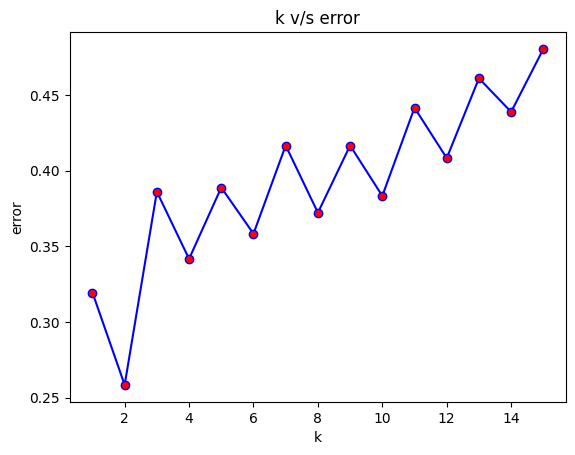

In [183]:
plt.plot(range(1,16),error_rate,color='blue',marker="o",markerfacecolor='red')
plt.xlabel("k")
plt.ylabel("error")
plt.title("k v/s error")

In [184]:
from sklearn.neighbors import KNeighborsClassifier
KNN1=KNeighborsClassifier(n_neighbors=2)
KNN1.fit(x_smote,y_smote)
y_pred_knn=KNN1.predict(x_test)

In [185]:
accuracy_score(y_test,y_pred_knn)

0.7416666666666667

In [186]:
from sklearn.ensemble import BaggingClassifier
model_bagg1=BaggingClassifier(estimator=KNN1,n_estimators=50)
model_bagg1.fit(x_smote,y_smote)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=2),
                  n_estimators=50)

In [187]:
ypred=model_bagg1.predict(x_smote)
accuracy_score(y_smote,ypred)

0.9407252440725244

In [188]:
y_pred_bagg=model_bagg1.predict(x_test)
accuracy_score(y_test,y_pred_bagg)

0.6555555555555556

**Testing accuracy is 65%**

# MODEL COMPARISON

In [189]:
df4={'MODEL':['SVM','LOGISTIC','RANDOM FOREST','DECISION TREE','GradientBoosting','XGBOOST','BAGGING'],
     'Training-ACCURACY':['91%','84%','100%','100%','97%','100%',"94%"],
    'Testing-ACCURACY':['84%','78%','85%','78%','87.5%','84%',"65%"]}
df4=pd.DataFrame(df4)
df4

MODEL Training-ACCURACY Testing-ACCURACY
0               SVM               91%              84%
1          LOGISTIC               84%              78%
2     RANDOM FOREST              100%              85%
3     DECISION TREE              100%              78%
4  GradientBoosting               97%            87.5%
5           XGBOOST              100%              84%
6           BAGGING               94%              65%

# CONCLUSION

1. Prepared a complete data analysis report on given data and found out how various factors like Age, Gender, EducationBackground, MaritalStatus,
EmpDepartment, EmpJobRole, BusinessTravelFrequency,DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent,EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear and their variation will effect in determining the employee attrition.

2. EDA has been performed on the data inorder to find out the relation among the data, its correlation, general patterns and trends.

3. Data has been preprocessed inorder to find out the missing values duplicate values and outlier detection.

4. There where no missing values as well as no duplicates rows.

5. Outliers has been removed using IQR method and Three sigma rule.

6. Minmax scaler is used to scale the data and One hot encoding is used to convert categorical columns to numerical values.

7. The target value which is of YES and NO has been replaced with (1,0) respectively.

8. The data was imbalanced so it was sampled using oversampling technique smote.

9. Done Feature engineering to select most relevant features ,analysed the correlation dropped unwanted features.

10. Seven models has been created:
    * 1st one was LOGISTIC REGRESSION  in which the accuracy was 78%.
    * 2nd one was SUPPORT VECTOR MACHINE in which the training accuracy was 91% and and testing accuracy was 84% after hyperparameter tuning.
    * 3rd one was DECISION TREE in which the model overfits so after hyperparameter tuning the accuracy is 84% but still the model overfits.
    * 4th one was RANDOM FOREST in which the model overfits so after hyperparameter tuning the accuracy is 85% bu still the model overfits.
    * 5th one was Gradient boosting classifier in which the accuracy was 87.5% for testing and 97% for training.
    * 6th one was XGboost whch after hyperparameter tuning gives 84% as accuracy but the model overfits.
    * 7th one was bagging using knn which gives accuracy of 65%.

11. So SUPPORT VECTOR CLASSIFIER is selected has the generalized model for given problem since it gives 91% for training and 84% for testing accuracy with a gap of only 7% compare to other models

# RISKS

1. Some of the model undergoes Overfitting
2. High computational time.
3. Unbalanced data.
4. Data quality

# RECOMMENDATIONS

1. Enhance environment statisfication,salary hike and promotion since these features show strong link to employee performance.
2. Conduct regular employee satisfaction surveys and address feedback promptly.
3. Provide clear growth opportunities and career development plans.
4. Recognize and reward achievements to boost morale.
5. Features like YearsInCurrentRole may indicate employees feel stagnant or lack development opportunities so implement regular training and upskilling programs tailored to employee needs.
6. High correlation with features like Environment Satisfaction suggests dissatisfaction with the work environment contributes to attrition so improve workplace amenities and ergonomics.
7. Analysis may reveal that certain departments, age groups, or experience levels have higher attrition rates.Implement tailored retention strategies for high-risk groups.
8. Features like YearsAtCompany show that newer employees leave more frequently, recruitment processes might need improvement.Clearly communicate job expectations and company culture during hiring.
9. Allow flexible work arrangements, including hybrid or remote work options.
10. Offer sufficient paid leave and encourage employees to take time off.
11. Review and adjust policies regularly to ensure alignment with employee needs.